In [1]:
from __future__ import division, print_function

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import seaborn; seaborn.set()

In [3]:
import os
import sys

In [4]:
from sklearn.decomposition import PCA, FastICA, FactorAnalysis, KernelPCA
from sklearn.manifold import TSNE
from sklearn.lda import LDA
from data import load_mdd_data

In [5]:
# from sklearn.datasets import load_iris
# data = load_iris()
# rma = data.data
# target = data.target

In [6]:
rma, target = load_mdd_data(data_path='../bucket/data/mdd/')
target = target['stress']
labels = np.unique(target)

## PCA

In [7]:
pca = PCA(n_components=10, whiten=True)
pcaed_rma = pca.fit_transform(rma, target)

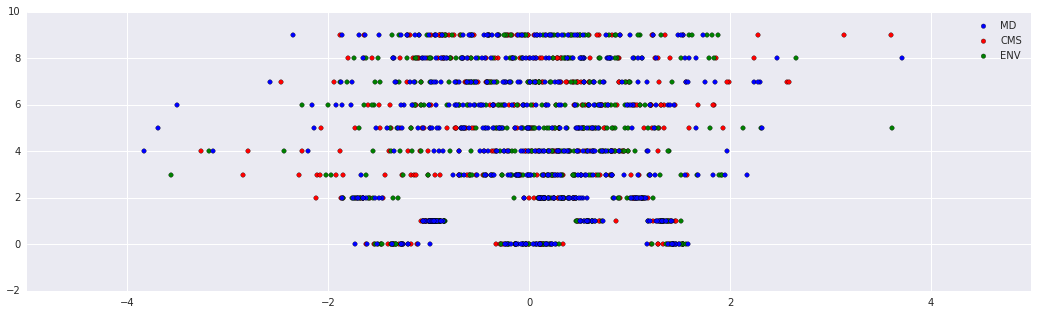

In [10]:
plt.figure(figsize=(18, 5))
legend_handles = {}
for comp in range(pca.n_components):
    for color, label in zip('rgb', labels):
        indices = target == label
        x = pcaed_rma[indices.values, comp]
        y = np.ones(x.shape) * comp
        legend_handles[label] = plt.scatter(x, y, c=color, label=label)
plt.legend(handles=legend_handles.values())
plt.show()

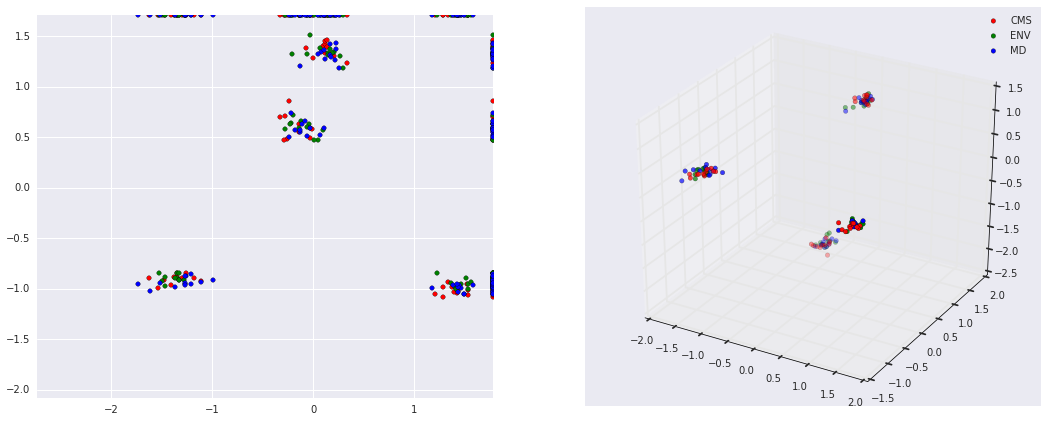

In [12]:
fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(121)
for color, label in zip('rgb', labels):
    indices = target == label
    x = pcaed_rma[indices.values, 0]
    y = pcaed_rma[indices.values, 1]
    ax.scatter(x, y, c=color, label=label)
    ax.scatter(x, np.ones_like(x) * (pcaed_rma[:, 1].max() + .2), c=color)
    ax.scatter(np.ones_like(y) * (pcaed_rma[:, 0].max() + .2), y, c=color)

plt.ylim(pcaed_rma[:, 1].min() - 1, pcaed_rma[:, 1].max() + .2)
plt.xlim(pcaed_rma[:, 0].min() - 1, pcaed_rma[:, 0].max() + .2)
plt.gca().set_aspect('equal', adjustable='box')

ax = fig.add_subplot(122, projection='3d')
for color, label in zip('rgb', labels):
    indices = target == label
    ax.scatter(pcaed_rma[indices.values, 0], 
               pcaed_rma[indices.values, 1], 
               pcaed_rma[indices.values, 2],
               c=color, label=label)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

## LDA

In [152]:
lda = LDA(n_components=2)
ldaed_rma = pca.fit_transform(rma, target)

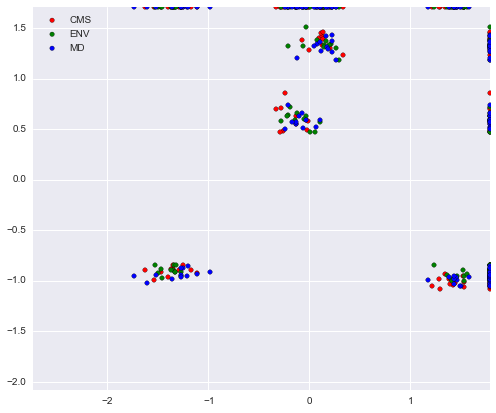

In [161]:
fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(121)
for color, label in zip('rgb', labels):
    indices = target == label
    x = ldaed_rma[indices.values, 0]
    y = ldaed_rma[indices.values, 1]
    ax.scatter(x, y, c=color, label=label)
    ax.scatter(x, np.ones_like(x) * (ldaed_rma[:, 1].max() + .2), c=color)
    ax.scatter(np.ones_like(y) * (ldaed_rma[:, 0].max() + .2), y, c=color)
plt.ylim(ldaed_rma[:, 1].min() - 1, ldaed_rma[:, 1].max() + .2)
plt.xlim(ldaed_rma[:, 0].min() - 1, ldaed_rma[:, 0].max() + .2)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc='upper left')
plt.show()